In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

In [ ]:
!pip install konlpy > /dev/null

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # 그림을 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
import pandas as pd

In [ ]:
df

,이름,종류,평점,숙박가격,도보시간,인기테그,별점 높은순 후기,별점 낮은순 후기,주소,객실수,...,지하철역_평균거리(1km내),교통유동인구_월평균승차수(1km내),교통유동인구_월평균하차수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내),관광지_최단거리(1km내),관광지_평균거리(1km내),쇼핑몰_최단거리(1km내),쇼핑몰_평균거리(1km내)
0,앰배서더 서울 풀만 호텔,프리미엄호텔,4.8,250000,동대입구역 1번출구 250m,"['주차가능', '야외수영장', '수영장', '와이파이', '사우나', '클럽라운지...","['시설에 비해 가격도 저렴합니당', '너무너무 깨끗하고 쾌적합니다.', '룸서비스...",[],서울특별시 중구 동호로 287,269,...,0.68,65461.18,66068.77,131529.95,6,6,0.61,0.82,0.57,0.79
1,글래드 여의도,4성급,4.7,200640,국회의사당역 4번출구 도보 1분,"['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '바', ...","['정말 좋아요 말이 필요 없어요!', '컨디션은 항상 너무 좋네요! 최저가로 저렴...","['데이유즈 쪼매난 글씨에 속아 숙박전환 추가 55천원내고 아주 식겁시키네요', '...",서울특별시 영등포구 의사당대로 16,319,...,0.90,41877.82,44699.42,86577.24,9,2,0.19,0.63,0.75,0.87
2,글래드 마포,4성급,4.8,143000,공덕역 바로 앞,"['주차가능', '와이파이', '객실금연', '피트니스', '어메니티', '비즈니스']","['너무 좋았습니다! 다음에 재방문할게요~~!', '자주 놀러가는 곳이에요', '완...","['난방이 안되는 호텔춥다고 했더니 체크인시 얘기했는데 어쩌라는 호텔', '지방에 ...",서울특별시 마포구 마포대로 92,378,...,0.55,20169.87,19680.47,39850.34,3,3,0.70,0.79,0.18,0.23
3,더 리프 사당,일반호텔,4.3,265000,서울특별시 관악구 남현 1길 66 사당역 5번 출구 도보 1분,"['스파/월풀/욕조', '와이파이', '객실금연', '24시간데스크', '비즈니스'...","['너무좋았어용', '너무 친절하시고 시설이 이쁘고 깔끔해서 좋았어요', '기념일 ...",[],서울특별시 관악구 남현1길 66,한국어,...,0.10,50042.49,51264.60,101307.08,9,3,0.16,0.71,0.49,0.81
4,나인트리 프리미어 로카우스 호텔 서울 용산,일반호텔,4.7,158000,용산역 1번 출구 도보 3분,"['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '연회장'...","['호캉스하기 좋아요', '좋아용 이용 추천', '어린 아이들이 놀기 좋은 적당한 ...",[],서울특별시 용산구 한강대로23길 25,274,...,0.69,27025.70,27633.21,54658.92,15,7,0.13,0.50,0.14,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,서울 인사동알게스트하우스,게스트하우스,4.8,60000,숙소 위치보기,['와이파이'],"['사장님너무친절하시고따뜻방이라 너무좋앗습니다', '깨끗하고 자취방 같이 아늑합니다...",[],서울특별시 종로구 수표로28길 12-3,NaN,...,0.56,79574.44,78905.40,158479.84,14,3,0.22,0.66,0.38,0.62
1202,서울 룩스게스트하우스,게스트하우스,3.6,57000,숙소 위치보기,['와이파이'],"['수건 많음, 화장실은 살짝 냄새남, 잠 자기에는 편했음, 이불이 푹신했음', '...",[],서울특별시 마포구 와우산로 156 5층,NaN,...,0.68,40068.55,40279.09,80347.64,24,8,0.04,0.58,0.28,0.48
1203,서울 Bottlehouse펜션,펜션/호스텔,4.0,108000,숙소 위치보기,"['와이파이', '독채객실']","['좋았어요!!!', '??숙소는 역근처 건물 3층에 위치하고 있어요. 찾아오기 어...",[],서울특별시 구로구 경인로25길 16 301호,NaN,...,NaN,0.00,0.00,0.00,2,2,0.26,0.45,0.09,0.43
1204,서울 종로준오호텔펜션,펜션/호스텔,5.0,90000,숙소 위치보기,"['와이파이', '상비약']",['숙소 깔끔하고 인테리어도 분위기 있어요! 특히 화장실 청소 잘되있습니다! 사장님...,[],서울특별시 종로구 인사동16길 6,NaN,...,0.68,75400.56,73681.34,149081.91,23,4,0.09,0.60,0.09,0.70


In [ ]:
df['인기테그']

0       ['주차가능', '야외수영장', '수영장', '와이파이', '사우나', '클럽라운지...
1       ['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '바', ...
2        ['주차가능', '와이파이', '객실금연', '피트니스', '어메니티', '비즈니스']
3       ['스파/월풀/욕조', '와이파이', '객실금연', '24시간데스크', '비즈니스'...
4       ['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '연회장'...
                              ...                        
1201                                             ['와이파이']
1202                                             ['와이파이']
1203                                     ['와이파이', '독채객실']
1204                                      ['와이파이', '상비약']
1205                                      ['와이파이', '상비약']
Name: 인기테그, Length: 1206, dtype: object

In [ ]:
df = pd.read_excel('./middle4.xlsx')

In [ ]:
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace(',','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('[','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace(']','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace("'",'')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('"','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('\'','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('\\\\r','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('?','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('.','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace("!",'')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('~','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('~~','')

df['별점 높은순 후기']

<ipython-input-143-bb5ab9cc8069>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('[','')
<ipython-input-143-bb5ab9cc8069>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace(']','')
<ipython-input-143-bb5ab9cc8069>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('\\\\r','')
<ipython-input-143-bb5ab9cc8069>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when re

0       시설에 비해 가격도 저렴합니당 너무너무 깨끗하고 쾌적합니다 룸서비스 최고 주차도 쉽...
1       정말 좋아요 말이 필요 없어요 컨디션은 항상 너무 좋네요 최저가로 저렴하게 호캉스 ...
2       너무 좋았습니다 다음에 재방문할게요 자주 놀러가는 곳이에요 완벽합니당 위치 시설 편...
3       너무좋았어용 너무 친절하시고 시설이 이쁘고 깔끔해서 좋았어요 기념일 기념으로 방문한...
4       호캉스하기 좋아요 좋아용 이용 추천 어린 아이들이 놀기 좋은 적당한 깊이의 수영장이...
                              ...                        
1201    사장님너무친절하시고따뜻방이라 너무좋앗습니다 깨끗하고 자취방 같이 아늑합니다 모텔은 ...
1202    수건 많음 화장실은 살짝 냄새남 잠 자기에는 편했음 이불이 푹신했음 가성비 접근성 ...
1203    좋았어요 숙소는 역근처 건물 3층에 위치하고 있어요 찾아오기 어렵지 않아요 엘레베이...
1204    숙소 깔끔하고 인테리어도 분위기 있어요 특히 화장실 청소 잘되있습니다 사장님도 친절...
1205    독립된 화장실이 있어서 9만원 정도에 방을 잡았습니다 늦은 시간에 예약했다지만 도착...
Name: 별점 높은순 후기, Length: 1206, dtype: object

In [ ]:
df['별점 높은순 후기']=df['별점 높은순 후기'].str.split()
df['별점 높은순 후기'][0]


['시설에',
 '비해',
 '가격도',
 '저렴합니당',
 '너무너무',
 '깨끗하고',
 '쾌적합니다',
 '룸서비스',
 '최고',
 '주차도',
 '쉽고',
 '지하철도',
 '근처에있어서',
 '좋다뷰가',
 '막',
 '좋진않지만',
 '나쁘지않고',
 '시설이',
 '깨끗해서',
 '좋음수영장은',
 '생각보다',
 '넓고',
 '깨끗해서',
 '최고서비스친절함도',
 '당연히',
 '좋음가격이',
 '좀',
 '비싸지만',
 '할인받아서가면',
 '가격이상의',
 '만족도를',
 '느낄수있음',
 '편하게',
 '쉬다왔습니다',
 '조식도',
 '굿',
 '남산이',
 '엄청',
 '가깝네요',
 'ㅎ',
 '최고입니다',
 '엄청',
 '깨끗하고',
 '좋았어요',
 '정말',
 '좋아요',
 '뷔페도',
 '유명한만큼',
 '맛있고',
 '직원들이',
 '모두',
 '웃는',
 '얼굴로',
 '맞이해줘서',
 '기분이',
 '좋았습니다',
 '라운지가',
 '다른',
 '호텔대비',
 '음식이',
 '잘',
 '나옵니다다만',
 '룸은',
 '살짝작아요',
 '여러모로',
 '최고였습니다',
 '매우만족함',
 '훌륭합니다',
 '최곱니다',
 '너무좋았습니다',
 '진짜',
 '너무',
 '즐거운',
 '호캉스였던것',
 '같아요',
 '우선',
 '친절함이야',
 '당연하고수영장과',
 '사우나까지',
 '모두',
 '포함된이그제큐티브',
 '라운지라너무',
 '행복한',
 '하루였어요:)',
 '라운지',
 '사용',
 '너무너무',
 '좋네요',
 '^^*',
 '다시',
 '가고',
 '싶어요',
 '친절하고',
 '조식이',
 '맛있었어요',
 '너무',
 '좋아요',
 '또',
 '갈',
 '예정',
 '직원분들도',
 '너무',
 '친절하셨고',
 '해피아워',
 '에프터눈티',
 '조식',
 '수영장',
 '이용했는데',
 '정말',
 '대접',
 '받고',
 '온',
 '기분이였습니다',
 '저는',
 '다음',
 '방문도'

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'


In [ ]:
wc = WordCloud(background_color='white', max_words=2000,font_path=font_path)
tag_string = ' '.join(df['인기테그'])
wc.generate(tag_string)

In [ ]:
count = 0
for key, value in wc.words_.items():
  print(key, ':', value)
  count += 1
  if count > 10:
    break

어메니티 24시간데스크 : 1.0
무료영화 OTT : 0.8236994219653179
와이파이 VOD : 0.8005780346820809
주차가능 와이파이 : 0.7283236994219653
VOD 24시간데스크 : 0.6127167630057804
수화물보관 주차가능 : 0.5924855491329479
스파 월풀 : 0.5433526011560693
월풀 욕조 : 0.5433526011560693
와이파이 트윈베드 : 0.5346820809248555
와이파이 객실금연 : 0.5115606936416185
비즈니스 수화물보관 : 0.5086705202312138


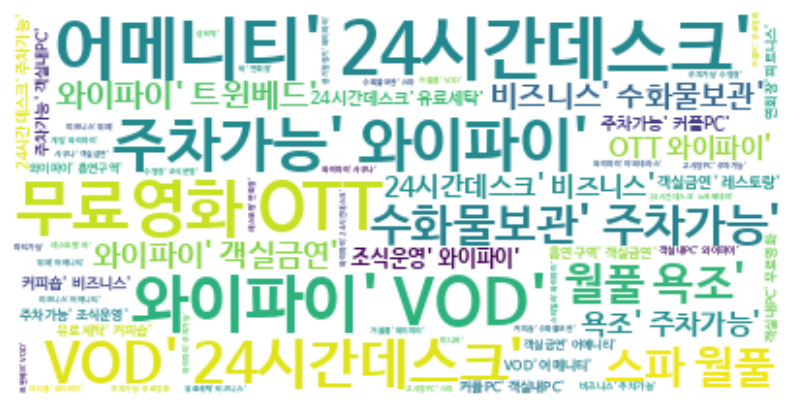

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
     

['시설에',
 '비해',
 '가격도',
 '저렴합니당',
 '너무너무',
 '깨끗하고',
 '쾌적합니다',
 '룸서비스',
 '최고',
 '주차도',
 '쉽고',
 '지하철도',
 '근처에있어서',
 '좋다뷰가',
 '막',
 '좋진않지만',
 '나쁘지않고',
 '시설이',
 '깨끗해서',
 '좋음수영장은',
 '생각보다',
 '넓고',
 '깨끗해서',
 '최고서비스친절함도',
 '당연히',
 '좋음가격이',
 '좀',
 '비싸지만',
 '할인받아서가면',
 '가격이상의',
 '만족도를',
 '느낄수있음',
 '편하게',
 '쉬다왔습니다',
 '~',
 '조식도',
 '굿',
 '남산이',
 '엄청',
 '가깝네요',
 'ㅎ',
 '최고입니다',
 '엄청',
 '깨끗하고',
 '좋았어요',
 '정말',
 '좋아요',
 '뷔페도',
 '유명한만큼',
 '맛있고',
 '직원들이',
 '모두',
 '웃는',
 '얼굴로',
 '맞이해줘서',
 '기분이',
 '좋았습니다',
 '라운지가',
 '다른',
 '호텔대비',
 '음식이',
 '잘',
 '나옵니다다만',
 '룸은',
 '살짝작아요',
 '여러모로',
 '최고였습니다',
 '매우만족함',
 '훌륭합니다',
 '최곱니다',
 '너무좋았습니다',
 '진짜',
 '너무',
 '즐거운',
 '호캉스였던것',
 '같아요',
 '\\r우선',
 '친절함이야',
 '당연하고\\r수영장과',
 '사우나까지',
 '모두',
 '포함된\\r이그제큐티브',
 '라운지라\\r너무',
 '행복한',
 '하루였어요:)',
 '라운지',
 '사용',
 '너무너무',
 '좋네요',
 '^^*',
 '다시',
 '가고',
 '싶어요',
 '친절하고',
 '조식이',
 '맛있었어요',
 '너무',
 '좋아요',
 '또',
 '갈',
 '예정~',
 '직원분들도',
 '너무',
 '친절하셨고',
 '해피아워',
 '에프터눈티',
 '조식',
 '수영장',
 '이용했는데',
 '정말',
 '대접',
 '받고',
 '온',
 '기분이였습니다',
 

In [ ]:
sw1=STOPWORDS
sw1.add('너무')
sw1.add('수 있도록')
sw1.add('너무')
sw1.add('잘 쉬다')
sw1.add('쉬다 갑니다')
sw1.add('잘쉬다갑니다')
sw1.add('잘 쉬었습니다')
sw1.add('깔끔하고')
sw1.add('깨끗하고')
sw1.add('좋습니다')
sw1.add('잘 쉬다')
sw1.add('이용해 주셔서')
sw1.add('소중한 후기')
sw1.add('저희 호텔을')
sw1.add('좋아요')
sw1.add('수')
sw1.add('있도록')
sw1.add('좋았습니다')
sw1.add('엄청')
sw1.add('소중한')
sw1.add('후기')
sw1.add('이용해')
sw1.add('주셔서')
sw1.add('감사합니다')
sw1.add('만족합니다')
sw1.add('좋았어요')
sw1.add('쉬다')
sw1.add('갑니다')
sw1.add('쉬었습니다')
sw1.add('항상')
sw1.add('잘쉬다가요')
sw1.add('좋네요')
sw1.add('정말')
sw1.add('쉬다갑니다')
sw1.add('좋아용')
sw1.add('좋았고')
sw1.add('편하게')
sw1.add('좀')
sw1.add('아주')
sw1.add('조금')
sw1.add('숙소')
sw1.add('위치가')
sw1.add('사장님')
sw1.add('매우')
sw1.add('다음에')
sw1.add('또')
sw1.add('진짜')
sw1.add('안녕하세요')
sw1.add('생각보다')
sw1.add('근데')
sw1.add('쉬다가')
sw1.add('많이')
sw1.add('가요')
sw1.add('쉬다가요')
sw1.add('매번')
sw1.add('위치도')
sw1.add('쉬고')
sw1.add('잘쉬다')
sw1.add('조아요')
sw1.add('ㅎㅎ')
sw1.add('그냥')
sw1.add('그래도')
sw1.add('있어서')
sw1.add('다만')
sw1.add('노력하겠습니다')
sw1.add('감사합니다')
sw1.add('하루 보내세요')
sw1.add('없어서')
sw1.add('더')
sw1.add('좋음')
sw1.add('더')
sw1.add('나은')
sw1.add('언제나')
sw1.add('여기')
sw1.add('감사드립니다')
sw1.add('많은')
sw1.add('이용')
sw1.add('있고')
sw1.add('것')
sw1.add('같아요')
sw1.add('이용')
sw1.add('했습니다')
sw1.add('하루')
sw1.add('되세요')
sw1.add('tt')
sw1.add('다')
sw1.add('t')
sw1.add('잘쉬고갑니다')
sw1.add('저희')
sw1.add('호텔을')
sw1.add('저희 호텔을')
sw1.add('늘')
sw1.add('완전')
sw1.add('있는')
sw1.add('방도')
sw1.add('갑니당')
sw1.add('왔어요')
sw1.add('너무너무')
sw1.add('다음에도')
sw1.add('전체적으로')
sw1.add('편히')
sw1.add('자주')

In [ ]:
from wordcloud import WordCloud
wc1 = WordCloud(background_color='white', max_words=2000, font_path=font_path, stopwords=sw1)
# Join the elements of each list into a single string
tag_string1 = ' '.join([' '.join(tags) for tags in df['별점 높은순 후기']])
wc1.generate(tag_string1)

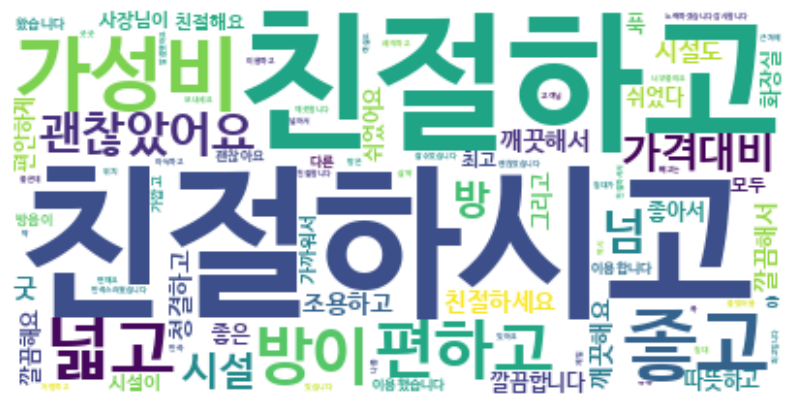

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace(',','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('[','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace(']','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace("'",'')
df['별점 낮은순 후기']

<ipython-input-41-360585c93d3e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('[','')
<ipython-input-41-360585c93d3e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace(']','')


0                                                        
1       데이유즈 쪼매난 글씨에 속아 숙박전환 추가 55천원내고 아주 식겁시키네요 12시까지...
2       난방이 안되는 호텔춥다고 했더니 체크인시 얘기했는데 어쩌라는 호텔 지방에 살고 있어...
3                                                        
4                                                        
                              ...                        
1216                                                     
1217                                                     
1218                                                     
1219                                                     
1220                                                     
Name: 별점 낮은순 후기, Length: 1221, dtype: object

In [ ]:
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('고객님','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('노력하겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('보답해드리겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('부탁드리겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('이용해주셔서','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('대처하겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('앞으로도','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('불편한','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('죄송합니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('불편을','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('모시겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('앞으로','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace(',','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('[','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace(']','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace("'",'')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('"','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('\'','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('\\\\r','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('?','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('.','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace("!",'')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('~','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('~~','')
     

<ipython-input-217-7c430dbbb94a>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('[','')
<ipython-input-217-7c430dbbb94a>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace(']','')
<ipython-input-217-7c430dbbb94a>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('\\\\r','')
<ipython-input-217-7c430dbbb94a>:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings whe

In [ ]:
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.split()
df['별점 낮은순 후기'][1]

['데이유즈',
 '쪼매난',
 '글씨에',
 '속아',
 '숙박전환',
 '추가',
 '55천원내고',
 '아주',
 '식겁시키네요',
 '12시까지',
 '대실이었음',
 '돈',
 '8만원날림새벽에',
 '쫒겨남',
 '숙소',
 '자체가',
 '너무',
 '시끄러웠습니다',
 '청소를',
 '저녁까지',
 '하시고',
 '낮에는',
 '옆에',
 '건물',
 '공사를',
 '하더라구요',
 '철근',
 '떨어지는',
 '소리',
 '숙박',
 '여러',
 '곳에서',
 '해보면서',
 '이렇게',
 '잠',
 '못잔',
 '곳',
 '처음이었습니다ㅠ',
 '친절히',
 '방',
 '교체해',
 '주셨지만',
 '소용이',
 '없었어요ㅠ',
 '그리고',
 '침대',
 '이불',
 '속에서',
 '플라스틱',
 '뚜껑',
 '나오고',
 '사이드',
 '테이블',
 '완전',
 '더럽더라구요',
 '한',
 '번도',
 '안닦은거',
 '같아요',
 '(tv밑에',
 '이동식',
 '대리석',
 '테이블)',
 '잠을',
 '못자서',
 '다음',
 '스케쥴에도',
 '지장',
 '있었습니다ㅠ',
 '그리고',
 '국회의사당',
 '앞이라',
 '시위도',
 '후',
 '조명이',
 '너무',
 '어둡습니다',
 '숙박해도',
 '주차비',
 '5천원',
 '받아요',
 '샤워실',
 '배수가',
 '제대로',
 '안',
 '돼요',
 '조식',
 '돈',
 '아까워요',
 '뷰가',
 '없어요',
 '창문으로',
 '보이는',
 '옆건물',
 '사무실뷰와',
 '더러운',
 '객실상태가',
 '아쉬웠어요',
 '청소좀',
 '그만하세요',
 '아님',
 '안',
 '하는',
 '방에',
 '주던가',
 '다시는',
 '가고싶지',
 '않습니다식당에서',
 '룸서비스를',
 '시키고',
 '결제를',
 '했는데',
 '자기네',
 '카드',
 '체크기에',
 '안떴다고',
 '다시결제를',
 '하라고',
 '하더군요',
 '분명',
 '제',
 '카드에서

In [ ]:
df['별점 낮은순 후기'] = df['별점 낮은순 후기'].astype(str)

In [ ]:
#불용어 처리
sw = STOPWORDS
sw.add('좋아요')
sw.add('안녕하세요')
sw.add('좋았습니다')
sw.add('불편을 드려')
sw.add('드려 죄송합니다')
sw.add('진짜')
sw.add('너무')
sw.add('그냥')
sw.add('정말')
sw.add('바로')
sw.add('계속')
sw.add('그리고')
sw.add('소중한후기')
sw.add('예약했는데')
sw.add('다른')
sw.add('다')
sw.add('좋았어요')
sw.add('좀')
sw.add('방')
sw.add('많이')
sw.add('객실')
sw.add('다시')
sw.add('그')
sw.add('더')
sw.add('감사합니다')
sw.add('했는데')
sw.add('있도록')
sw.add('그리고')
sw.add('다른')
sw.add('하고')
sw.add('안')
sw.add('바로')
sw.add('없고')
sw.add('왜')
sw.add('다시')
sw.add('계속')
sw.add('제대로')
sw.add('제가')
sw.add('방에')
sw.add('무슨')
sw.add('방이')
sw.add('방')
sw.add('저희가')
sw.add('그래서')
sw.add('ㅠㅠ')
sw.add('다시는')
sw.add('같은')
sw.add('하는')
sw.add('좀')
sw.add('이렇게')
sw.add('있도록')
sw.add('여기')
sw.add('다시는')
sw.add('바로')
sw.add('이용해')
sw.add('주셔서')
sw.add('이용해 주셔서')
sw.add('수 있도록')
sw.add('수')
sw.add('있도록')
sw.add('조금')
sw.add('있어서')

In [ ]:
wc3 = WordCloud(background_color='white', max_words=2000,font_path=font_path, stopwords=sw)
tag_string3 = ' '.join(df['별점 낮은순 후기'])
wc3.generate(tag_string3)

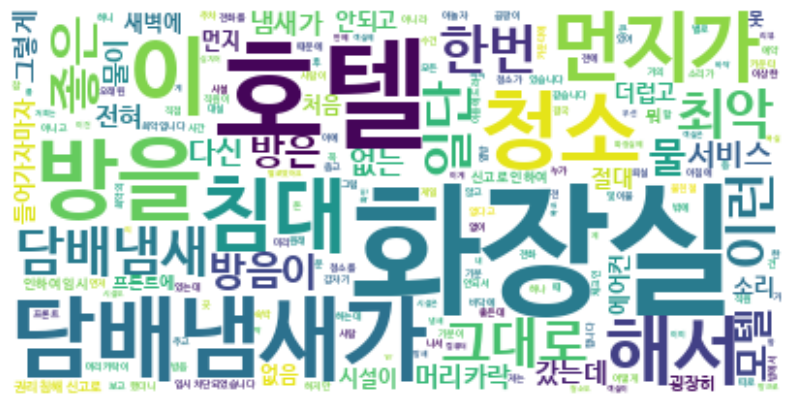

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc3, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df['인기테그,별점 낮은순 후기,별점 높은순 후기'] = df['인기테그'].astype(str) + df['별점 낮은순 후기'].astype(str) + df['별점 높은순 후기'].astype(str)

In [ ]:
wc4 = WordCloud(background_color='white', max_words=2000,font_path=font_path)
tag_string4 = ' '.join(df['인기테그,별점 낮은순 후기,별점 높은순 후기'])
wc4.generate(tag_string4)

KeyError: ignored

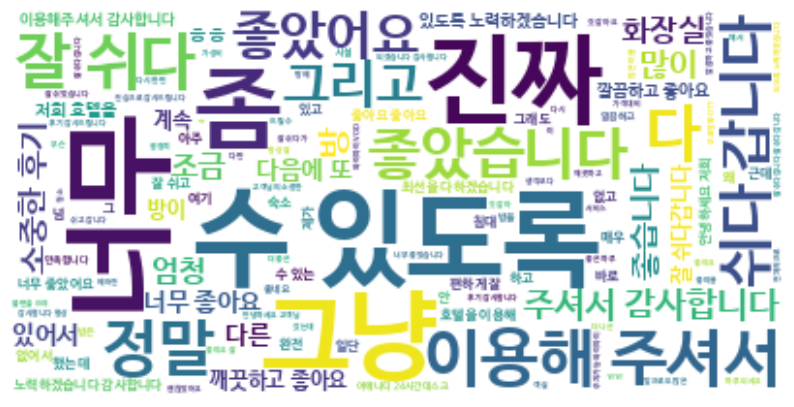

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc4, interpolation='bilinear')
plt.axis('off')
plt.show()